# Exercises: Convolutions

## Problems

1. Designing Convolutions
2. MNIST Fashion

In [ ]:
from fastai.vision.all import *
from scipy.signal import convolve2d
import numpy as np
from PIL import Image as im

# Adapted from https://stackoverflow.com/questions/56099069/rgb-image-convolution-from-scipy
def color_conv(image, filter):
    imdat = np.array(image, dtype=float)

    for i in range(3):
        imdat[:, :, i] = convolve2d(imdat[:, :, i], filter[i], mode='same')#, boundary='symm')
        imdat[:, :, i] = imdat[:, :, i]-np.min(imdat[:, :, i])
        if np.max(imdat[:,:,i]) != 0:
            imdat[:, :, i] = imdat[:, :, i]*255/np.max(imdat[:, :, i])

    imdat = imdat.astype(dtype="uint8")

    return Image.fromarray(imdat)

## Designing Convolutions

Below is some starter code which:
* Downloads a PNG file
* Imports and then displays it
* Defines a filter to convolve the image with
* Performs the convolution and displays the result

**First:** What does the filter I've provided you with do? Explain how the numbers map to what you're seeing.

This is a 2D image, so adding a filter means changing numebrs across both the X and Y axis. Right now what we're doing is creating new RGB values and changing the value to a -1 in ONLY THE RED FILTER changes the red values in all the pixels. What this does is it takes the red parts of an image, and changes the edge of a red object to be the same color as the center and takes the center of a red object and makes it be the same color as the edge.

**Then:** Design some new filters. Save each in a variable.
1. Remove the blue from the image.
2. Translate the image one pixel to the left.
2. Move the red layer left 1 pixel and the blue layer right 1 pixel.
2. Blur the image.
3. Find any vertical edge.
2. Find vertical edges which are green.
4. Find horizontal edges in which there is a color gradient.

**Finally:** Upload your own image to Colab and test your filters out.

In [ ]:
!wget https://mario.wiki.gallery/images/1/12/Piranha-Plant.png
!wget https://media.timeout.com/images/105636969/1920/1080/image.jpg

--2024-11-04 14:21:29--  https://mario.wiki.gallery/images/1/12/Piranha-Plant.png
Resolving mario.wiki.gallery (mario.wiki.gallery)... 104.26.14.185, 104.26.15.185, 172.67.69.125, ...
Connecting to mario.wiki.gallery (mario.wiki.gallery)|104.26.14.185|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1381 (1.3K) [image/png]
Saving to: ‘Piranha-Plant.png.1’

Piranha-Plant.png.1 100%[===================>]   1.35K  --.-KB/s    in 0s      

2024-11-04 14:21:29 (21.3 MB/s) - ‘Piranha-Plant.png.1’ saved [1381/1381]

--2024-11-04 14:21:29--  https://media.timeout.com/images/105636969/1920/1080/image.jpg
Resolving media.timeout.com (media.timeout.com)... 13.35.166.48, 13.35.166.101, 13.35.166.10, ...
Connecting to media.timeout.com (media.timeout.com)|13.35.166.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 158794 (155K) [image/jpeg]
Saving to: ‘image.jpg.1’

image.jpg.1         100%[===================>] 155.07K  --.-KB/s    in 0.01s   

2

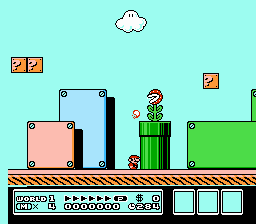

In [ ]:
image = Image.open('Piranha-Plant.png').convert('RGB')
image

In [ ]:
#1
R = np.array([[0., 0., 0.],
              [0., 1., 0.],
              [0., 0., 0.]])

G = np.array([[0., 0., 0.],
              [0., 1., 0.],
              [0., 0., 0.]])

B = np.array([[0., 0., 0.],
              [0., 0., 0.],
              [0., 0., 0.]])

color_filter = np.stack([R, G, B])

In [ ]:
#2
R = np.array([[0., 0., 0.],
              [-1., 0., 0.],
              [0., 0., 0.]])

G = np.array([[0., 0., 0.],
              [1., 0., 0.],
              [0., 0., 0.]])

B = np.array([[0., 0., 0.],
              [1., 0., 0.],
              [0., 0., 0.]])

color_filter = np.stack([R, G, B])

In [ ]:
#3
R = np.array([[0., 0., 0.],
              [1., 0., 0.],
              [0., 0., 0.]])

G = np.array([[0., 0., 0.],
              [0., 1., 0.],
              [0., 0., 0.]])

B = np.array([[0., 0., 0.],
              [0., 0., 0.],
              [0., 0., 0.]])

color_filter = np.stack([R, G, B])

In [ ]:
#4
R = np.array([[0.111, 0.111, 0.111],
                 [0.111, 0.111, 0.111],
                 [0.111, 0.111, 0.111]])

G = np.array([[0.111, 0.111, 0.111],
                 [0.111, 0.111, 0.111],
                 [0.111, 0.111, 0.111]])

B = np.array([[0.111, 0.111, 0.111],
                 [0.111, 0.111, 0.111],
                 [0.111, 0.111, 0.111]])

color_filter = np.stack([R, G, B])

In [ ]:
#5
R = np.array([[-1, 1.0, 0],
                 [-1, 1.0, 0],
                 [-1, 1.0, 0]])

G = np.array([[-1, 1.0, 0],
                 [-1, 1.0, 0],
                 [-1, 1.0, 0]])

B = np.array([[-1, 1.0, 0],
                 [-1, 1.0, 0],
                 [-1, 1.0, 0]])

color_filter = np.stack([R, G, B])

In [ ]:
#6 - unfinished
R = np.arrayR = np.array([[0., 0., 0.],
              [0., 0., 0.],
              [0., 0., 0.]])

G = np.array([[-1, 1.0, 0],
                 [-1, 1.0, 0],
                 [-1, 1.0, 0]])

B = np.arrayR = np.array([[0., 0., 0.],
              [0., 0., 0.],
              [0., 0., 0.]])

color_filter = np.stack([R, G, B])

In [ ]:
#7 - unfinished
R = np.array([[-1, -1, -1],
                 [1, 1, 1],
                 [0, 0, 0]])

G = np.array([[-1, -1, -1],
                 [1, 1, 1],
                 [0, 0, 0]])

B = np.array([[-1, -1, -1],
                 [1, 1, 1],
                 [0, 0, 0]])

color_filter = np.stack([R, G, B])

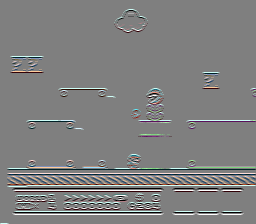

In [ ]:
color_conv(image, color_filter)

## MNIST Fashion

Build and train a neural network from scratch to classify data in the [Fashion MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist) dataset. This dataset is 28x28 black and white images like the hand-drawn digits, but is pictures of different articles of clothing and fashion accessories.

Incorporate batch normalization and use onecycle training and do your best to get a good result with a small network. Show your confusion matrix and comment.

